# Summary
[**Best practices link**](https://machinelearningmastery.com/best-practices-for-preparing-and-augmenting-image-data-for-convolutional-neural-networks/)

- Data Preparation
    - A fixed size must be selected for input images, and all images must be resized to that shape. The most common type of pixel scaling involves centering pixel values per-channel, perhaps followed by some type of normalization.
- Train-Time Augmentation
    - Train-time augmentation is required, most commonly involved resizing and cropping of input images, as well as modification of images such as shifts, flips and changes to colors.
- Test-Time Augmentation
    - Test-time augmentation was focused on systematic crops of the input images to ensure features present in the input images were detected.

In [1]:
import numpy as np
from PIL import Image

# Define path of data
products = ['chinkiang_vinegar','katsuobushi','lurpak']

# Test just 1 product now
product = products[0]

# Test just 1 image now
path = f'data/{product}/{product}_1.png'

# Normalise pixel values
Only do this if we have reason to believe that different features have  different scales, which should be of approx. equal importance to the learning algorithm

Not really needed for images, since pixel values can only range from 0 and 255

# Zero-Centering Pixel Values
Manual example of zero-centering pixel values:

In [2]:
# Load image
img = Image.open(path)
pixels = np.asarray(img)
pixels = pixels.astype('float32')

# centre pixel values
# Global center = calculate and subtract mean across all colour channels
# Local centre = calculate and subtract mean per colour channel

def centre_pixels(pixels,local=True,visualise=False):
    if local:
        # calculate per-channel means and standard deviations
        means = pixels.mean(axis=(0,1), dtype='float64')
        print('Means: %s' % means)
        print('Mins: %s, Maxs: %s' % (pixels.min(axis=(0,1)), pixels.max(axis=(0,1))))
        # per-channel centering of pixels
        pixels -= means
        # confirm it had the desired effect
        means = pixels.mean(axis=(0,1), dtype='float64')
        print('Means: %s' % means)
        print('Mins: %s, Maxs: %s' % (pixels.min(axis=(0,1)), pixels.max(axis=(0,1))))
    else:
        # calculate global mean
        mean = pixels.mean()
        print('Mean: %.3f' % mean)
        print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
        # global centering of pixels
        pixels -= mean
        # confirm it had the desired effect
        mean = pixels.mean()
        print('Mean: %.3f' % mean)
        print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
    
    if visualise:
        # Visualise current image
        pixels = pixels.astype(np.uint8)
        img = Image.fromarray(pixels)
        img.show()

centre_pixels(pixels)
pixels

Means: [232.19542342 228.89418018 217.33503303]
Mins: [0. 0. 0.], Maxs: [255. 255. 255.]
Means: [ 4.99870684e-07 -1.17054931e-07 -8.18278696e-07]
Mins: [-232.19542 -228.89418 -217.33504], Maxs: [22.804577 26.10582  37.664967]


array([[[22.804577, 26.10582 , 37.664967],
        [22.804577, 26.10582 , 37.664967],
        [22.804577, 26.10582 , 37.664967],
        ...,
        [22.804577, 26.10582 , 37.664967],
        [22.804577, 26.10582 , 37.664967],
        [22.804577, 26.10582 , 37.664967]],

       [[22.804577, 26.10582 , 37.664967],
        [22.804577, 26.10582 , 37.664967],
        [22.804577, 26.10582 , 37.664967],
        ...,
        [22.804577, 26.10582 , 37.664967],
        [22.804577, 26.10582 , 37.664967],
        [22.804577, 26.10582 , 37.664967]],

       [[22.804577, 26.10582 , 37.664967],
        [22.804577, 26.10582 , 37.664967],
        [22.804577, 26.10582 , 37.664967],
        ...,
        [22.804577, 26.10582 , 37.664967],
        [22.804577, 26.10582 , 37.664967],
        [22.804577, 26.10582 , 37.664967]],

       ...,

       [[22.804577, 26.10582 , 37.664967],
        [22.804577, 26.10582 , 37.664967],
        [22.804577, 26.10582 , 37.664967],
        ...,
        [22.804577, 26.105

# Resizing Images

## Required Image Dimensions
Resize based off the [ResNet architecture](https://towardsdatascience.com/an-overview-of-resnet-and-its-variants-5281e2f56035)
- ResNet is a CNN architecture, with an RNN-like functionality that solves for the vanishing gradient problem!
- From [Keras](https://keras.io/applications/#resnet), the default input size for this model is **224x224**
    - Can also use this link to learn how to use **transfer learning**
    - [How to use transfer learning](https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/)
- [Deeper information about CNNs in general](http://cs231n.github.io/convolutional-networks/#case)

In [3]:
# Current image dimensions
pixels.shape

(500, 333, 3)

## Using Keras to resize images
- [Step-by-step guide](https://www.pyimagesearch.com/2018/09/10/keras-tutorial-how-to-get-started-with-keras-deep-learning-and-python/) to using Keras for CNN

In [4]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

image = load_img(path, target_size=(224, 224)) # Squishes image!
image = img_to_array(image)

C:\Users\BobJin\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)


In [5]:
# set the matplotlib backend so figures can be saved in the background
import matplotlib
# matplotlib.use("Agg")

# import the necessary packages
import tensorflow as tf
from tensorflow.keras import layers

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# from keras.models import Sequential
# from keras.layers.core import Dense
# from keras.optimizers import SGD
# from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import pickle
import cv2
import os

In [6]:
def getListOfFiles(dirName):
    '''Create a list of file and subdir names in given directory
    '''
    allFiles = list()
    dirName = 'data'
    for (dirpath, dirnames, filenames) in os.walk(dirName):
        allFiles += [os.path.join(dirpath, file) for file in filenames]

    return allFiles

In [7]:
# initialize the data and labels
print("[INFO] loading images...")
data = []
labels = []
 
# grab the image paths and randomly shuffle them
imagePaths = sorted(getListOfFiles('data'))
random.seed(69)
random.shuffle(imagePaths)
 
# loop over the input images
for imagePath in imagePaths:
    # load the image, resize the image to be 224x224 pixels (ignoring
    # aspect ratio), flatten the image into 224x224x3=150528 pixel image
    # into a list, and store the image in the data list
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (224, 224)).flatten()
    data.append(image)
 
    # extract the class label from the image path and update the
    # labels list
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)

# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

[INFO] loading images...


## Data Segmentation

In [8]:
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.1, random_state=69)

# convert the labels from integers to vectors (for 2-class, binary
# classification you should use Keras' to_categorical function
# instead as the scikit-learn's LabelBinarizer will not return a
# vector)
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

## Define Keras model architecture
- Use basic structure, then recreate ResNet

In [9]:
# define the 150528-1024-512-3 architecture using Keras
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1024, input_shape=(150528,), activation="sigmoid"))
model.add(tf.keras.layers.Dense(512, activation="sigmoid"))
model.add(tf.keras.layers.Dense(len(lb.classes_), activation="softmax"))


# initialize our initial learning rate and # of epochs to train for
INIT_LR = 0.01
EPOCHS = 30
 
# compile the model using SGD as our optimizer and categorical
# cross-entropy loss (you'll want to use binary_crossentropy
# for 2-class classification)
print("[INFO] training network...")
opt = tf.keras.optimizers.SGD(lr=INIT_LR)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
[INFO] training network...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              154141696 
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 1539      
Total params: 154,668,035
Trainable params: 154,668,035
Non-trainable params: 0
_________________________________________________________________


In [10]:
# train the neural network
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=EPOCHS, batch_size=32)

Train on 262 samples, validate on 30 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/75
262/262 [==============================] - 1s 5ms/sample - loss: 1.1635 - acc: 0.3397 - val_loss: 1.0786 - val_acc: 0.3667
Epoch 2/75
262/262 [==============================] - 1s 3ms/sample - loss: 1.0676 - acc: 0.4160 - val_loss: 0.8234 - val_acc: 0.8333
Epoch 3/75
262/262 [==============================] - 1s 3ms/sample - loss: 0.9182 - acc: 0.5191 - val_loss: 0.7726 - val_acc: 0.6667
Epoch 4/75
262/262 [==============================] - 1s 3ms/sample - loss: 0.7701 - acc: 0.6756 - val_loss: 0.5771 - val_acc: 1.0000
Epoch 5/75
262/262 [==============================] - 1s 3ms/sample - loss: 0.7761 - acc: 0.6832 - val_loss: 0.5602 - val_acc: 0.9000
Epoch 6/75
262/262 [==============================] - 1s 3ms/sample - loss: 0.6119 - acc: 0.8206 - val_loss: 0.5326 - val_acc: 0.9333
Epoch 7/75
262/262 [==============================] - 1s 3ms/sample - loss: 0.5190 - acc: 0.9046 - val_

262/262 [==============================] - 1s 3ms/sample - loss: 0.0656 - acc: 0.9924 - val_loss: 0.0530 - val_acc: 1.0000
Epoch 60/75
262/262 [==============================] - 1s 3ms/sample - loss: 0.0609 - acc: 0.9885 - val_loss: 0.0530 - val_acc: 1.0000
Epoch 61/75
262/262 [==============================] - 1s 3ms/sample - loss: 0.0654 - acc: 0.9885 - val_loss: 0.0576 - val_acc: 1.0000
Epoch 62/75
262/262 [==============================] - 1s 3ms/sample - loss: 0.0619 - acc: 0.9885 - val_loss: 0.0614 - val_acc: 1.0000
Epoch 63/75
262/262 [==============================] - 1s 3ms/sample - loss: 0.0567 - acc: 0.9924 - val_loss: 0.0507 - val_acc: 1.0000
Epoch 64/75
262/262 [==============================] - 1s 3ms/sample - loss: 0.0557 - acc: 0.9885 - val_loss: 0.1105 - val_acc: 0.9667
Epoch 65/75
262/262 [==============================] - 1s 3ms/sample - loss: 0.0566 - acc: 0.9885 - val_loss: 0.0578 - val_acc: 1.0000
Epoch 66/75
262/262 [==============================] - 1s 3ms/sampl

[INFO] evaluating network...
                   precision    recall  f1-score   support

chinkiang_vinegar       1.00      1.00      1.00        10
      katsuobushi       1.00      1.00      1.00        11
           lurpak       1.00      1.00      1.00         9

         accuracy                           1.00        30
        macro avg       1.00      1.00      1.00        30
     weighted avg       1.00      1.00      1.00        30



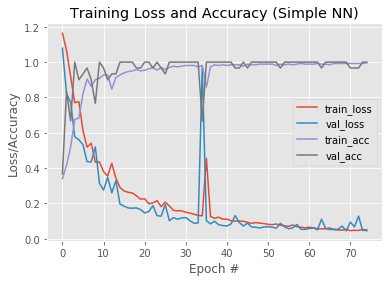

In [12]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))
 
# plot the training loss and accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["acc"], label="train_acc")
plt.plot(N, H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()